**Import all necessary libraries**

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**Import the Dataset:**

In [76]:
df = pd.read_csv('/content/Titanic-dataset.csv')

In [77]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [78]:
df.shape

(418, 12)

In [79]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

*   Pclass: Passenger Class(1=1st, 2=2nd, 3=3rd)
*   SibSp: No. of siblings/spouses aboard
*   Parch: No. of parents/children aboard
*   Ticket: Ticket number
*   Embarked: Port of embarkation(C=Cherbourg, Q=Queenstown, S=Southampton

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# **Data Preprocessing:**

**Checking if null values are present**

In [81]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Heatmap of null values:**

<Axes: >

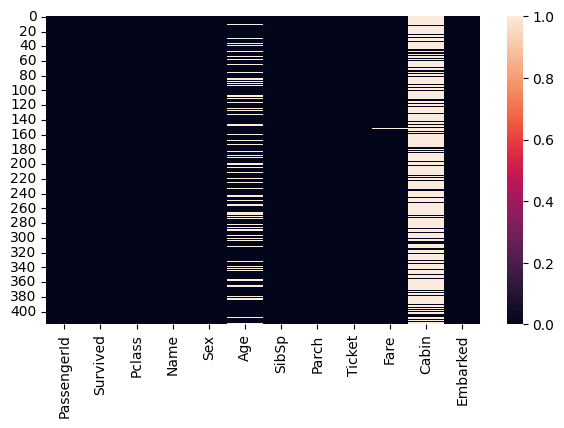

In [82]:
plt.figure(figsize=(7,4))
sns.heatmap(df.isnull())

In [83]:
df["PassengerId"].duplicated().sum()

0

In [84]:
numerical_data=[]
object_data=[]
for column in df.columns:
  if df.dtypes[column] != 'object':
    numerical_data.append(column)
  else:
    object_data.append(column)

In [85]:
numerical_data

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [86]:
object_data

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

**KNN Imputer to fill in missing values of column 'Age' :**

In [87]:
imputer = KNNImputer(n_neighbors=5)
df[numerical_data] = imputer.fit_transform(df[numerical_data])

**Fill in missing values of column
 'Cabin'  by random choice :**

In [88]:
for column in df.columns:
  missing_values = df[df[column].isnull()].index
  avail_values = df[column].dropna()

  for i in missing_values:
    random_choice = np.random.choice(avail_values)
    df.at[i,column] = random_choice

In [89]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892.0,0.0,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,C31,Q
1,893.0,1.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,C116,S
2,894.0,0.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,D10 D12,Q
3,895.0,0.0,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,B26,S
4,896.0,1.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,E46,S


In [90]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<Axes: >

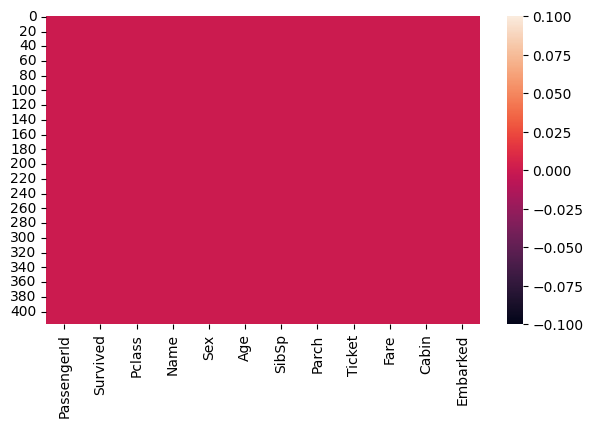

In [91]:
plt.figure(figsize=(7,4))
sns.heatmap(df.isnull())

In [92]:
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)

In [93]:
df['Sex'] = df['Sex'].map({'female':1, 'male':0})

In [94]:
df.dtypes

PassengerId    float64
Survived       float64
Pclass         float64
Name            object
Sex              int64
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

In [97]:
df['Age'] = df['Age'].astype(int)
df['Pclass'] = df['Pclass'].astype(int)
df['Survived'] = df['Survived'].astype(int)
df['SibSp'] = df['SibSp'].astype(int)
df['Parch'] = df['Parch'].astype(int)
df['Fare'] = df['Fare'].astype(int)

# **Data Visualization:**

In [98]:
df['Sex'].value_counts()

0    266
1    152
Name: Sex, dtype: int64

<Axes: ylabel='Sex'>

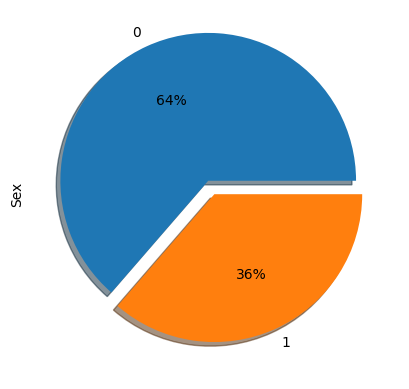

In [99]:
df['Sex'].value_counts().plot.pie(explode = [0.1,0],autopct = "%1.0f%%",shadow=True)

<Axes: xlabel='Survived', ylabel='count'>

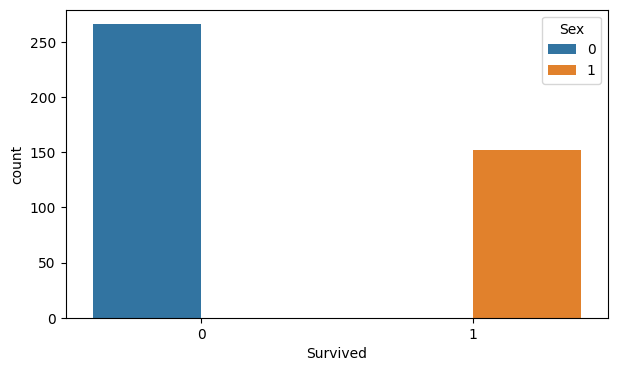

In [100]:
fig=plt.figure(figsize=(7,4))
sns.countplot(x='Survived', data=df, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

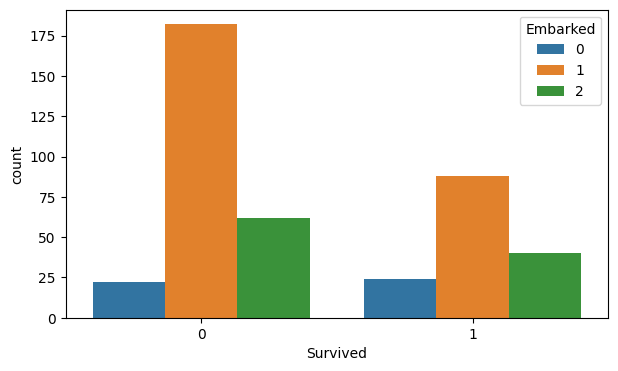

In [101]:
fig=plt.figure(figsize=(7,4))
sns.countplot(x='Survived', data=df, hue='Embarked')

<Axes: xlabel='Survived', ylabel='count'>

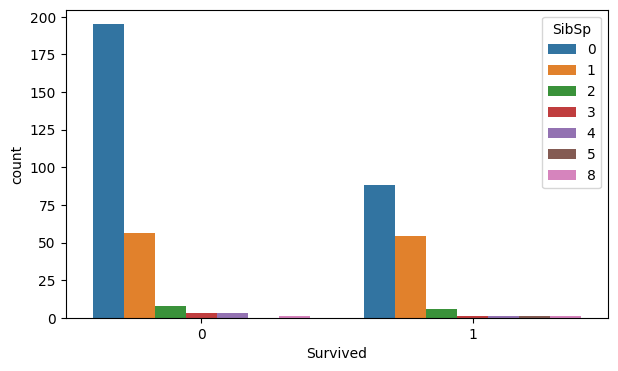

In [102]:
fig=plt.figure(figsize=(7,4))
sns.countplot(x='Survived', data=df, hue='SibSp')

<Axes: xlabel='Survived', ylabel='count'>

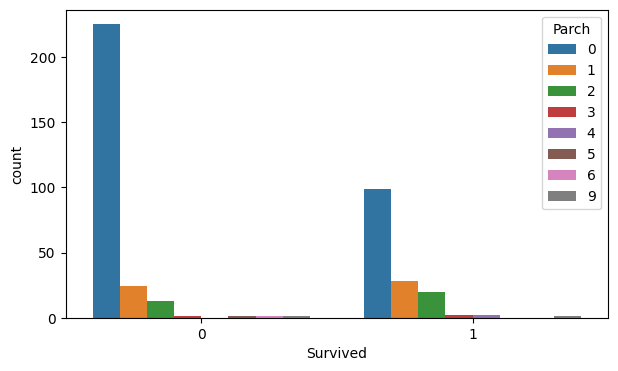

In [103]:
fig=plt.figure(figsize=(7,4))
sns.countplot(x='Survived', data=df, hue='Parch')

<Axes: xlabel='Survived', ylabel='count'>

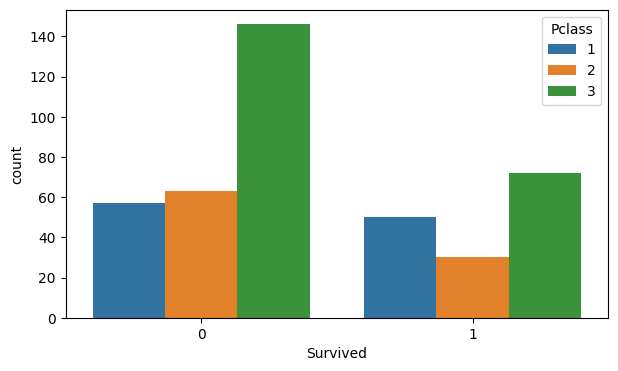

In [104]:
fig=plt.figure(figsize=(7,4))
sns.countplot(x='Survived', data=df, hue='Pclass')

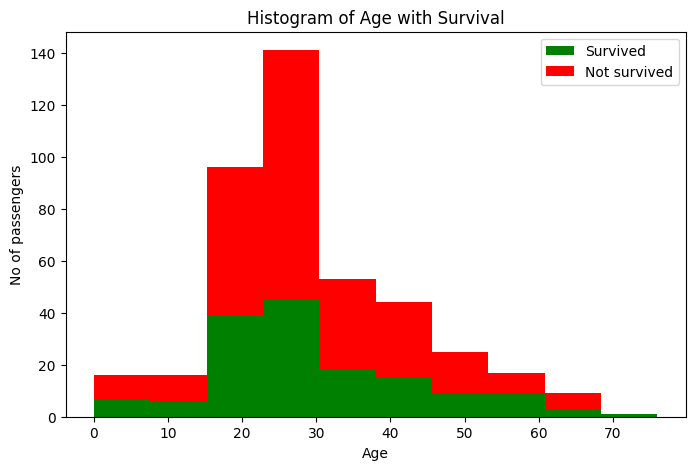

In [105]:
fig = plt.figure(figsize =(8,5))
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Histogram of Age with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

In [116]:
X = df.drop(['Name','Ticket','Cabin','Survived'],axis=1)
y=df['Survived']

# **Model Preparation:**

**Splitting into Testing and Training Data:**

In [117]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=101)

**Creating Logistic Regression Model:**

In [118]:
logmodel = LogisticRegression()

In [119]:
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
predictions = logmodel.predict(X_test)

**Comparing predicted values with y_test:**

In [121]:
score = accuracy_score(y_test, predictions)
score

1.0